In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter
from matplotlib.lines import Line2D

In [ ]:
url = 'https://drive.google.com/file/d/1Yx_DYY6a_S2xEomiAj38eGuro05XcoEI/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
categories_df = pd.read_csv(path)
categories_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53231 entries, 0 to 53230
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_order          53231 non-null  int64  
 1   product_quantity  53231 non-null  int64  
 2   sku               53231 non-null  object 
 3   unit_price        53231 non-null  float64
 4   date              53231 non-null  object 
 5   name              53231 non-null  object 
 6   desc              53231 non-null  object 
 7   price             53231 non-null  float64
 8   type              52904 non-null  float64
 9   discount          53231 non-null  float64
 10  product_category  53231 non-null  object 
dtypes: float64(4), int64(2), object(5)
memory usage: 4.5+ MB


In [ ]:
categories_df['date'] = pd.to_datetime(categories_df['date'])
categories_df["month"] = categories_df["date"].dt.month
categories_df["year"] = categories_df["date"].dt.year
categories_df['type'] = pd.to_numeric(categories_df['type']).astype('Int64')
categories_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53231 entries, 0 to 53230
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_order          53231 non-null  int64         
 1   product_quantity  53231 non-null  int64         
 2   sku               53231 non-null  object        
 3   unit_price        53231 non-null  float64       
 4   date              53231 non-null  datetime64[ns]
 5   name              53231 non-null  object        
 6   desc              53231 non-null  object        
 7   price             53231 non-null  float64       
 8   type              52904 non-null  Int64         
 9   discount          53231 non-null  float64       
 10  product_category  53231 non-null  object        
 11  month             53231 non-null  int64         
 12  year              53231 non-null  int64         
dtypes: Int64(1), datetime64[ns](1), float64(3), int64(4), object(4)
memory usage

In [ ]:
categories_df

,id_order,product_quantity,sku,unit_price,date,name,desc,price,type,discount,product_category,month,year
0,299545,1,OWC0100,47.49,2017-01-01 01:46:16,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,12755395,13.50,Hard Drives Accessories,1,2017
1,299546,1,IOT0014,18.99,2017-01-01 01:50:34,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,22.95,5720,3.96,Stands & Supports,1,2017
2,295347,1,APP0700,72.19,2017-01-01 01:54:11,Apple 85W MagSafe 2 charger MacBook Pro screen...,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,89.00,13005399,16.81,Charger,1,2017
3,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14,(Open) Crucial 240GB SSD 7mm BX200,SSD hard drive and high-speed performance with...,76.99,1298,16.09,Open - Accessories & Gadgets,1,2017
4,299561,1,PEB0015,142.49,2017-01-01 02:38:50,Pebble Smartwatch Time Steel Black,Bluetooth Smart Watch with steel case leather ...,299.99,11905404,157.50,Other,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53226,527035,1,APP0698,9.99,2018-03-14 11:42:41,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1230,15.01,Cables & Adapters,3,2018
53227,527070,2,APP0698,9.99,2018-03-14 11:49:01,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1230,15.01,Cables & Adapters,3,2018
53228,527074,2,APP0698,9.99,2018-03-14 11:49:36,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1230,15.01,Cables & Adapters,3,2018
53229,527096,3,APP0698,9.99,2018-03-14 11:54:35,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1230,15.01,Cables & Adapters,3,2018


In [ ]:
categories_df['discount %'] = categories_df['discount'] / categories_df['price'] * 100
categories_df

,id_order,product_quantity,sku,unit_price,date,name,desc,price,type,discount,product_category,month,year,discount %
0,299545,1,OWC0100,47.49,2017-01-01 01:46:16,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,12755395,13.50,Hard Drives Accessories,1,2017,22.134776
1,299546,1,IOT0014,18.99,2017-01-01 01:50:34,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,22.95,5720,3.96,Stands & Supports,1,2017,17.254902
2,295347,1,APP0700,72.19,2017-01-01 01:54:11,Apple 85W MagSafe 2 charger MacBook Pro screen...,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,89.00,13005399,16.81,Charger,1,2017,18.887640
3,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14,(Open) Crucial 240GB SSD 7mm BX200,SSD hard drive and high-speed performance with...,76.99,1298,16.09,Open - Accessories & Gadgets,1,2017,20.898818
4,299561,1,PEB0015,142.49,2017-01-01 02:38:50,Pebble Smartwatch Time Steel Black,Bluetooth Smart Watch with steel case leather ...,299.99,11905404,157.50,Other,1,2017,52.501750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53226,527035,1,APP0698,9.99,2018-03-14 11:42:41,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1230,15.01,Cables & Adapters,3,2018,60.040000
53227,527070,2,APP0698,9.99,2018-03-14 11:49:01,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1230,15.01,Cables & Adapters,3,2018,60.040000
53228,527074,2,APP0698,9.99,2018-03-14 11:49:36,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1230,15.01,Cables & Adapters,3,2018,60.040000
53229,527096,3,APP0698,9.99,2018-03-14 11:54:35,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1230,15.01,Cables & Adapters,3,2018,60.040000


In [ ]:
discounts_df = categories_df["discount %"]
discounts_df.loc[discounts_df < 0] = 0
discounts_df.max()


/var/folders/qp/byv49jm10nl3sccrqp350xn80000gn/T/ipykernel_21313/1070338913.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discounts_df.loc[discounts_df < 0] = 0


97.14081486776269

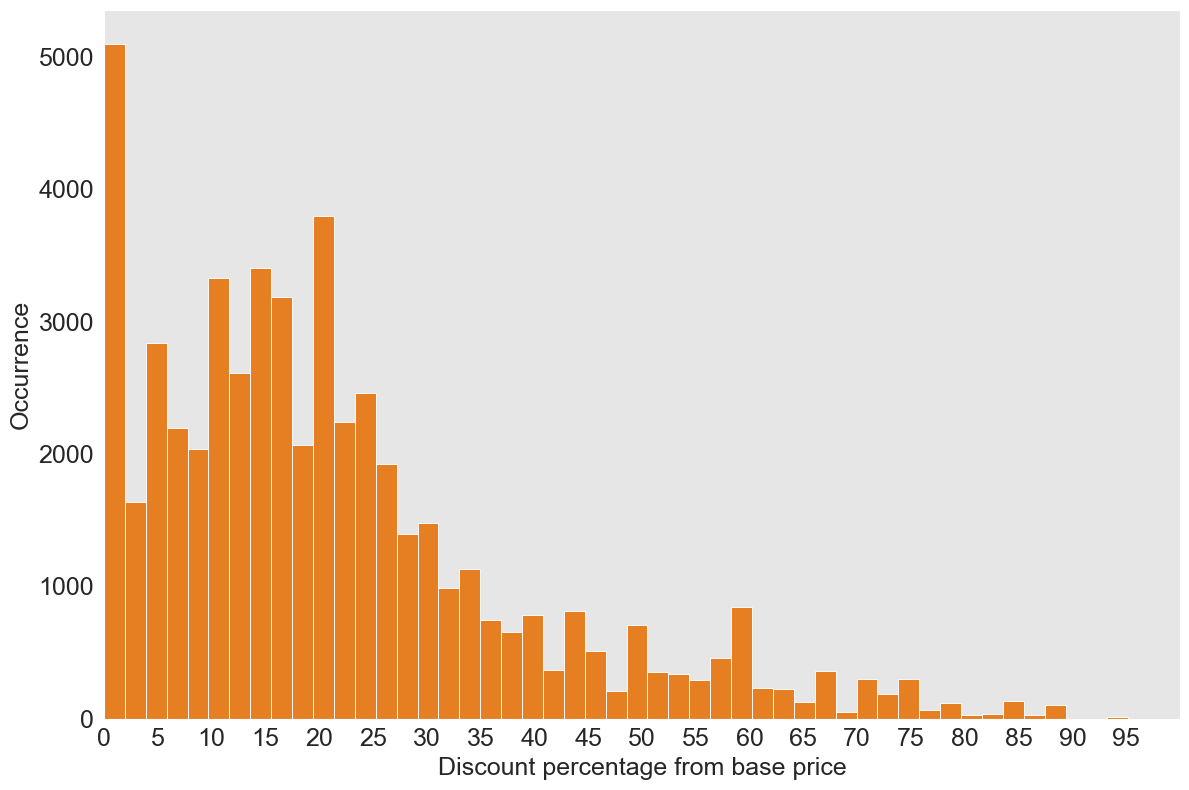

In [ ]:

size_bin = 50
sns.histplot(discounts_df, bins=size_bin)
size_font = 18
# plt.title("Discounts structure", fontsize=size_font)
plt.xlabel('Discount percentage from base price', fontsize=size_font)
plt.ylabel('Occurrence', fontsize=size_font)
plt.xticks(np.arange(0, categories_df["discount %"].max() + 0, 5), fontsize=size_font, rotation=0)
# plt.tick_params(axis='both', which='major', labelsize=size_font)
plt.yticks(fontsize=size_font)
plt.xlim(0,100)
# plt.grid(linewidth=1.0)
sns.set_style("dark", {"axes.facecolor": "0.9"})
plt.gcf().set_size_inches(12, 8)
plt.tight_layout()

# Select specific color for the bars
bars = plt.gca().patches
for bar in bars:
    bar.set_facecolor('#E67E22')

# Change the color of the line from blue to yellow
# line = plt.gca().lines[0]
# line.set_color('#F9DC5C')
# line.set_color('#333333')

plt.savefig('./plots/Discounts_structure' + '.png')
plt.show()

In [ ]:
correlation_sales = categories_df[["discount", "unit_price"]].corr()
print(correlation_sales)

            discount  unit_price
discount    1.000000    0.380841
unit_price  0.380841    1.000000


In [ ]:
correlation_units = categories_df[["discount", "product_quantity"]].corr()
print(correlation_units)

                  discount  product_quantity
discount          1.000000         -0.021284
product_quantity -0.021284          1.000000


In [ ]:
categories_df["has_discount"] = categories_df["discount"] > 0

monthly_aggregation = categories_df.groupby(['month', "has_discount"]).agg({
    'product_quantity': 'sum',
    'unit_price': 'sum',
    'discount': 'sum'
}).reset_index()

print(monthly_aggregation)

    month  has_discount  product_quantity  unit_price   discount
0       1         False              1021   115056.88   -7359.92
1       1          True             12392  1244435.89  289739.16
2       2         False               699    69773.54   -4012.70
3       2          True              6365   720001.14  158673.50
4       3         False               193    16317.67    -332.95
5       3          True              1906   206716.84   46823.52
6       4         False               198    23100.47   -1295.63
7       4          True              1934   187375.62   35628.24
8       5         False               353    44827.23   -2927.63
9       5          True              2220   245304.32   45743.84
10      6         False               236    48606.35   -3015.30
11      6          True              1815   207912.90   46681.98
12      7         False               350    53935.74   -4122.59
13      7          True              4275   509757.65  126082.66
14      8         False  

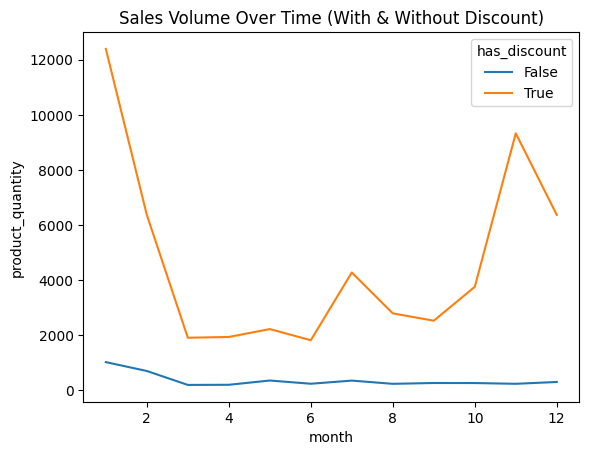

In [ ]:
sns.lineplot(data=monthly_aggregation, x="month", y="product_quantity", hue="has_discount")
plt.title("Sales Volume Over Time (With & Without Discount)")
plt.show()